## Final cluster annotations - analysis

In [1]:
# Import useful modules

import numpy as np
import pandas as pd
import scanpy as sc
import os
#import igraph
import matplotlib.pyplot as plt
import seaborn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()


scanpy==1.4+39.gc70f24b anndata==0.6.18 numpy==1.16.2 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 


In [2]:
sc.settings.set_figure_params(dpi=130)

In [3]:
# Load the integrated and annotated dataset
adata_ann = sc.read_h5ad('/Data/Annotated_dataset_v1.h5ad')

In [4]:
metadata = pd.read_csv('/Data/Annotated_dataset_metadata.tsv', sep = '\t')
adata_ann.obs['CellType.Corrected'] = metadata['CellType.Corrected']

In [5]:
adata_ann.obs['CellType.Corrected'] = metadata['CellType.Corrected']

In [6]:
metadata.head()

,Donor,Sample,Method,Position,UMI.Count,Expressed.Genes,Percent.Mitochond.,Percent.Ribo,Phenograph.large,Phenograph.small,...,CellType.Corrected_Rare,CellType.Corrected_Resident,CellType.Corrected_Cycling,CellType.Corrected_Secretory,CellType.Corrected_Suprabasal,CellType.Corrected,CellType.Corrected_rare,CellType.Corrected_cycling,x,y
D322_Biop_Nas1_AGCGGTCGTCATACTG-1-0,D322,D322_Biop_Nas1,Biopsy,Nasal,39002,1837,0.017050,0.104533,9,15,...,Serous,Serous,Serous,Serous,Serous,Serous,Serous,Serous,-4.318754,12.029687
D322_Biop_Nas1_CGAGAAGGTGAAGGCT-1-0,D322,D322_Biop_Nas1,Biopsy,Nasal,35414,1925,0.024341,0.195346,9,15,...,Serous,Serous,Serous,Serous,Serous,Serous,Serous,Serous,-4.756359,12.865348
D322_Biop_Nas1_GGGACCTGTCTAACGT-1-0,D322,D322_Biop_Nas1,Biopsy,Nasal,34877,1618,0.014910,0.097141,9,15,...,Serous,Serous,Serous,Serous,Serous,Serous,Serous,Serous,-5.432417,12.203785
D322_Biop_Nas1_GACTACACAGTCCTTC-1-0,D322,D322_Biop_Nas1,Biopsy,Nasal,34603,2079,0.025576,0.154380,9,15,...,Serous,Serous,Serous,Serous,Serous,Serous,Serous,Serous,-4.349734,13.235868
D322_Biop_Nas1_GAACCTACACGGTTTA-1-0,D322,D322_Biop_Nas1,Biopsy,Nasal,34548,1740,0.020812,0.129009,9,15,...,Serous,Serous,Serous,Serous,Serous,Serous,Serous,Serous,-4.795733,12.228488


... storing 'CellType.Corrected' as categorical


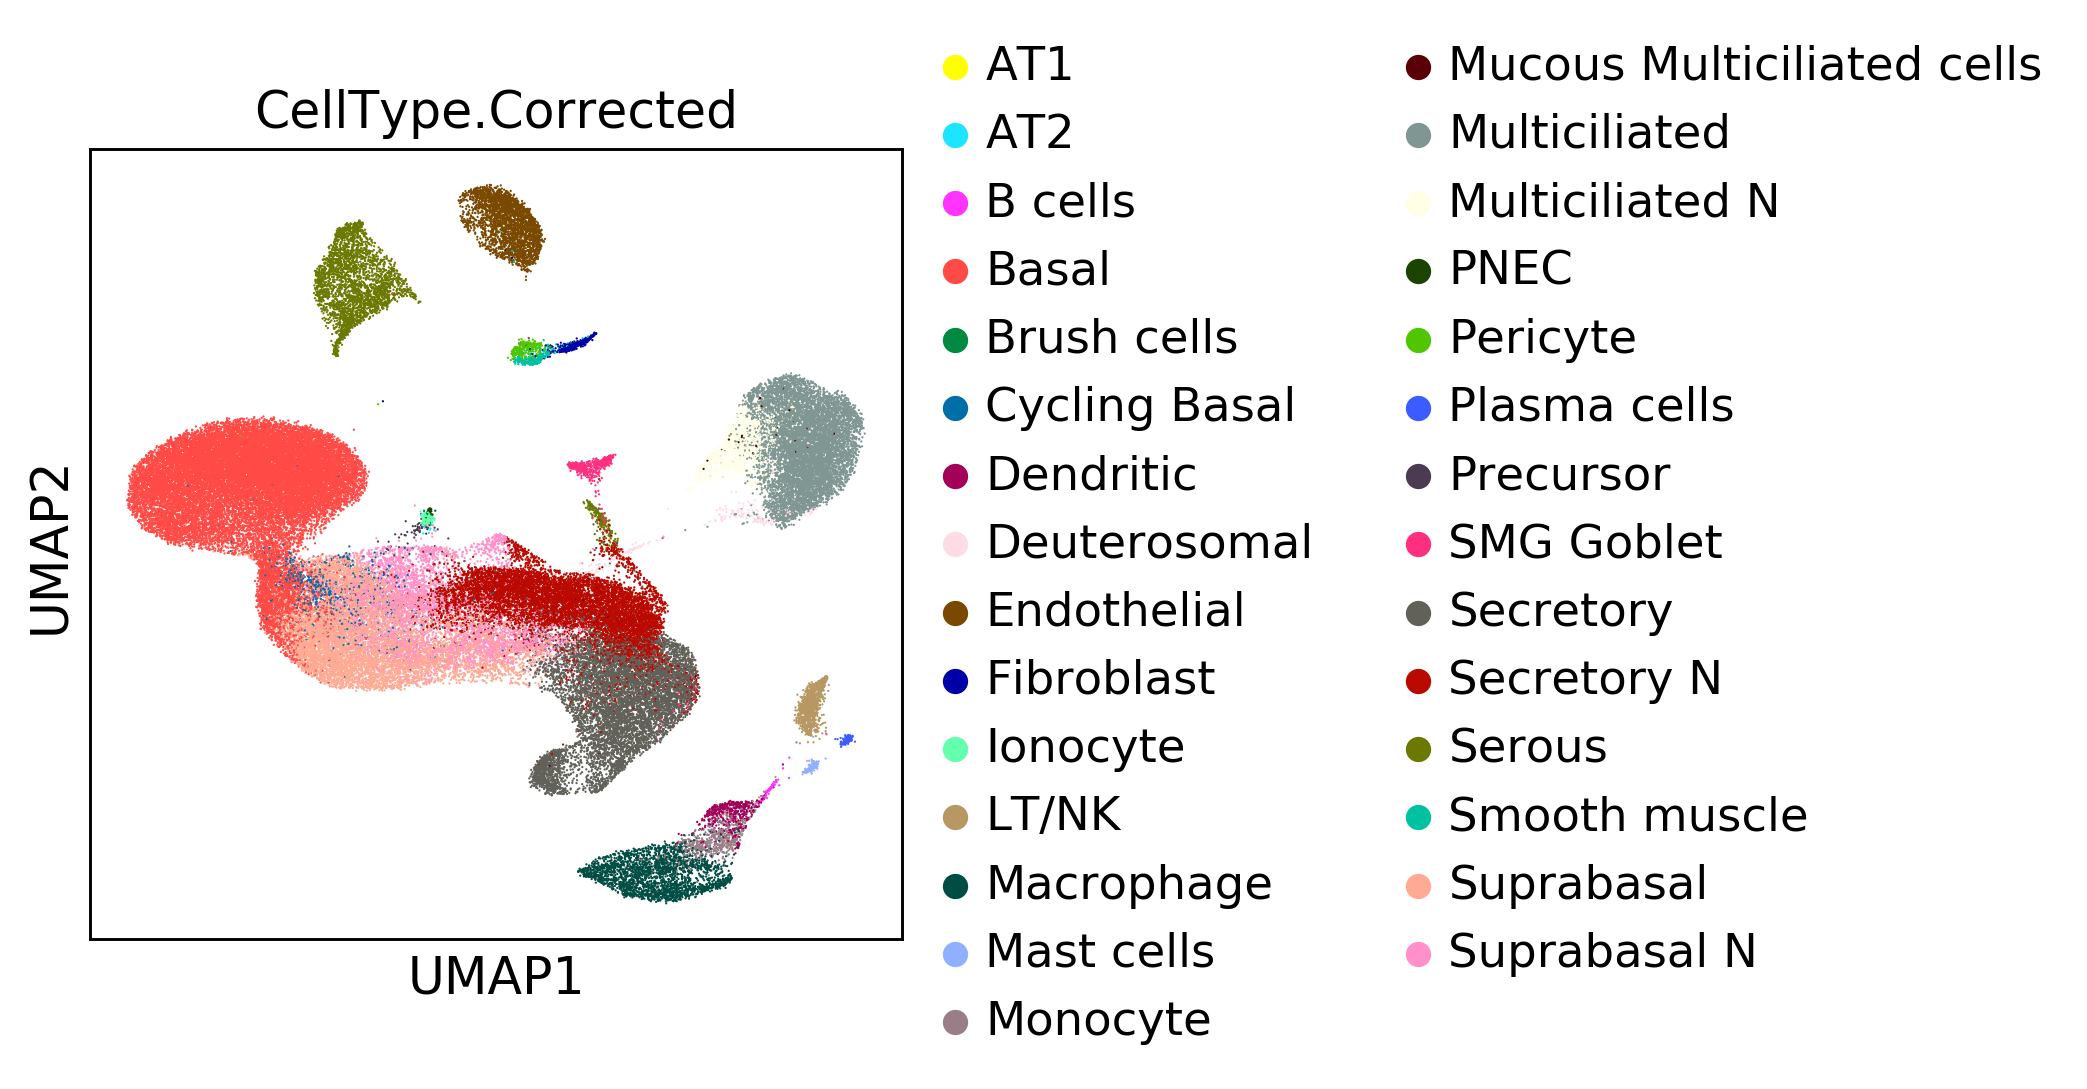

In [7]:
sc.pl.umap(adata_ann, color = ['CellType.Corrected'])

*** 
## Complete marker genes identification

In [8]:
cell_type_nb = {}
list_cell_type = adata_ann.obs['CellType.Corrected'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata_ann.obs['CellType.Corrected'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i
cell_type_nb
 

{'AT1': 0,
 'AT2': 1,
 'B cells': 2,
 'Basal': 3,
 'Brush cells': 4,
 'Cycling Basal': 5,
 'Dendritic': 6,
 'Deuterosomal': 7,
 'Endothelial': 8,
 'Fibroblast': 9,
 'Ionocyte': 10,
 'LT/NK': 11,
 'Macrophage': 12,
 'Mast cells': 13,
 'Monocyte': 14,
 'Mucous Multiciliated cells': 15,
 'Multiciliated': 16,
 'Multiciliated N': 17,
 'PNEC': 18,
 'Pericyte': 19,
 'Plasma cells': 20,
 'Precursor': 21,
 'SMG Goblet': 22,
 'Secretory': 23,
 'Secretory N': 24,
 'Serous': 25,
 'Smooth muscle': 26,
 'Suprabasal': 27,
 'Suprabasal N': 28}

In [9]:
vect = []
for i in range(0, len(adata_ann.obs['CellType.Corrected'])):
    vect = vect + [str(cell_type_nb[str(adata_ann.obs['CellType.Corrected'][i])])]
    
adata_ann.obs['CellType.Corrected_nb'] = vect

In [10]:
sc.tl.rank_genes_groups(adata_ann, groupby = 'CellType.Corrected_nb', method='wilcoxon', n_genes = 1000)

ranking genes


... storing 'CellType.Corrected_nb' as categorical


    finished (0:08:09.59) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [11]:
inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])

In [12]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in inverted_cell_type_nb.keys():
    clusters = clusters + ([inverted_cell_type_nb[cl]]*len(adata_ann.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata_ann.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata_ann.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata_ann.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata_ann.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata_ann.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [13]:
markers.to_csv(path_or_buf = '/Data/markers_all_celltype.tsv', 
               sep = '\t', index = False)


***

*** 
## Epithelial cell types marker identification

In [14]:
adata = adata_ann

In [15]:
cell_bool = []

for x in adata.obs['CellType.Corrected']:
    cell_bool = cell_bool + [x in ['Basal', 'Suprabasal', 'Suprabasal N', 'Secretory', 'Secretory N', 'Multiciliated',
                                  'Multiciliated N', 'Serous', 'SMG Goblet']]


In [16]:
list_of_cell_names = adata.obs.loc[cell_bool, :].index.tolist()
adata = adata[list_of_cell_names, ]
adata.shape

(68133, 18417)

In [17]:
cell_type_nb = {}
list_cell_type = adata.obs['CellType.Corrected'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata.obs['CellType.Corrected'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i
cell_type_nb
 

{'Basal': 0,
 'Multiciliated': 1,
 'Multiciliated N': 2,
 'SMG Goblet': 3,
 'Secretory': 4,
 'Secretory N': 5,
 'Serous': 6,
 'Suprabasal': 7,
 'Suprabasal N': 8}

In [18]:
vect = []
for i in range(0, len(adata.obs['CellType.Corrected'])):
    vect = vect + [str(cell_type_nb[str(adata.obs['CellType.Corrected'][i])])]
    
adata.obs['CellType.Corrected_nb'] = vect

In [19]:
sc.tl.rank_genes_groups(adata, groupby = 'CellType.Corrected_nb', method='wilcoxon', n_genes = 1000)

ranking genes


... storing 'CellType.Corrected_nb' as categorical


    finished (0:03:42.00) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [20]:
inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])

In [21]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in inverted_cell_type_nb.keys():
    clusters = clusters + ([inverted_cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [22]:
markers.to_csv(path_or_buf = '/Data/markers_epithelial_celltype.tsv', 
               sep = '\t', index = False)


*** 
## Rare cell types marker identification

In [23]:
adata = adata_ann

In [24]:
cell_bool = []

for x in adata.obs['CellType.Corrected']:
    cell_bool = cell_bool + [x in ['AT1', 'AT2', 'Brush cells', 'Precursor', 'Ionocyte', 'PNEC']]


In [25]:
list_of_cell_names = adata.obs.loc[cell_bool, :].index.tolist()
adata = adata[list_of_cell_names, ]
adata.shape

(237, 18417)

In [26]:
cell_type_nb = {}
list_cell_type = adata.obs['CellType.Corrected'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata.obs['CellType.Corrected'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i
cell_type_nb
 

{'AT1': 0,
 'AT2': 1,
 'Brush cells': 2,
 'Ionocyte': 3,
 'PNEC': 4,
 'Precursor': 5}

In [27]:
vect = []
for i in range(0, len(adata.obs['CellType.Corrected'])):
    vect = vect + [str(cell_type_nb[str(adata.obs['CellType.Corrected'][i])])]
    
adata.obs['CellType.Corrected_nb'] = vect

In [28]:
sc.tl.rank_genes_groups(adata, groupby = 'CellType.Corrected_nb', method='wilcoxon', n_genes = 1000)

... storing 'CellType.Corrected_nb' as categorical


ranking genes
    finished (0:00:03.25) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [29]:
inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])

In [30]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in inverted_cell_type_nb.keys():
    clusters = clusters + ([inverted_cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [31]:
markers.to_csv(path_or_buf = '/Data/markers_rare_celltype.tsv', 
               sep = '\t', index = False)


*** 
## Immune cell types marker identification

In [8]:
adata = adata_ann

In [9]:
cell_bool = []

for x in adata.obs['CellType.Corrected']:
    cell_bool = cell_bool + [x in ['LT/NK', 'Mast cells', 'B cells', 'Plasma cells', 'Macrophage', 'Monocyte', 'Dendritic']]


In [10]:
list_of_cell_names = adata.obs.loc[cell_bool, :].index.tolist()
adata = adata[list_of_cell_names, ]
adata.shape

(4889, 18417)

In [11]:
cell_type_nb = {}
list_cell_type = adata.obs['CellType.Corrected'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata.obs['CellType.Corrected'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i
cell_type_nb
 

{'B cells': 0,
 'Dendritic': 1,
 'LT/NK': 2,
 'Macrophage': 3,
 'Mast cells': 4,
 'Monocyte': 5,
 'Plasma cells': 6}

In [12]:
vect = []
for i in range(0, len(adata.obs['CellType.Corrected'])):
    vect = vect + [str(cell_type_nb[str(adata.obs['CellType.Corrected'][i])])]
    
adata.obs['CellType.Corrected_nb'] = vect

In [13]:
sc.tl.rank_genes_groups(adata, groupby = 'CellType.Corrected_nb', method='wilcoxon', n_genes = 1000)

... storing 'CellType.Corrected_nb' as categorical


ranking genes
    finished (0:00:12.54) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [14]:
inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])

In [15]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in inverted_cell_type_nb.keys():
    clusters = clusters + ([inverted_cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [16]:
markers.to_csv(path_or_buf = '/Data/markers_Immune_celltype.tsv', 
               sep = '\t', index = False)


*** 
## Mesenchymal cell types marker identification

In [17]:
adata = adata_ann

In [18]:
cell_bool = []

for x in adata.obs['CellType.Corrected']:
    cell_bool = cell_bool + [x in ['Endothelial', 'Smooth muscle', 'Pericyte', 'Fibroblast']]


In [19]:
list_of_cell_names = adata.obs.loc[cell_bool, :].index.tolist()
adata = adata[list_of_cell_names, ]
adata.shape

(3629, 18417)

In [20]:
cell_type_nb = {}
list_cell_type = adata.obs['CellType.Corrected'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata.obs['CellType.Corrected'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i
cell_type_nb
 

{'Endothelial': 0, 'Fibroblast': 1, 'Myofibroblast': 2, 'Smooth muscle': 3}

In [21]:
vect = []
for i in range(0, len(adata.obs['CellType.Corrected'])):
    vect = vect + [str(cell_type_nb[str(adata.obs['CellType.Corrected'][i])])]
    
adata.obs['CellType.Corrected_nb'] = vect

In [22]:
sc.tl.rank_genes_groups(adata, groupby = 'CellType.Corrected_nb', method='wilcoxon', n_genes = 1000)

... storing 'CellType.Corrected_nb' as categorical


ranking genes
    finished (0:00:09.24) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


In [23]:
inverted_cell_type_nb = dict([[v,k] for k,v in cell_type_nb.items()])

In [24]:
clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in inverted_cell_type_nb.keys():
    clusters = clusters + ([inverted_cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

In [25]:
markers.to_csv(path_or_buf = '/Data/markers_Mesenchymal_celltype.tsv', 
               sep = '\t', index = False)


***
## Non-Integrated data embedding

In [7]:
adata = adata_ann

In [8]:
sc.tl.pca(adata, svd_solver='arpack')

In [9]:
sc.pp.neighbors(adata, n_neighbors=100, n_pcs=12)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 12
    finished (0:01:26.91) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:03:00.74) --> added
    'X_umap', UMAP coordinates (adata.obsm)


... storing 'CellType.Corrected' as categorical


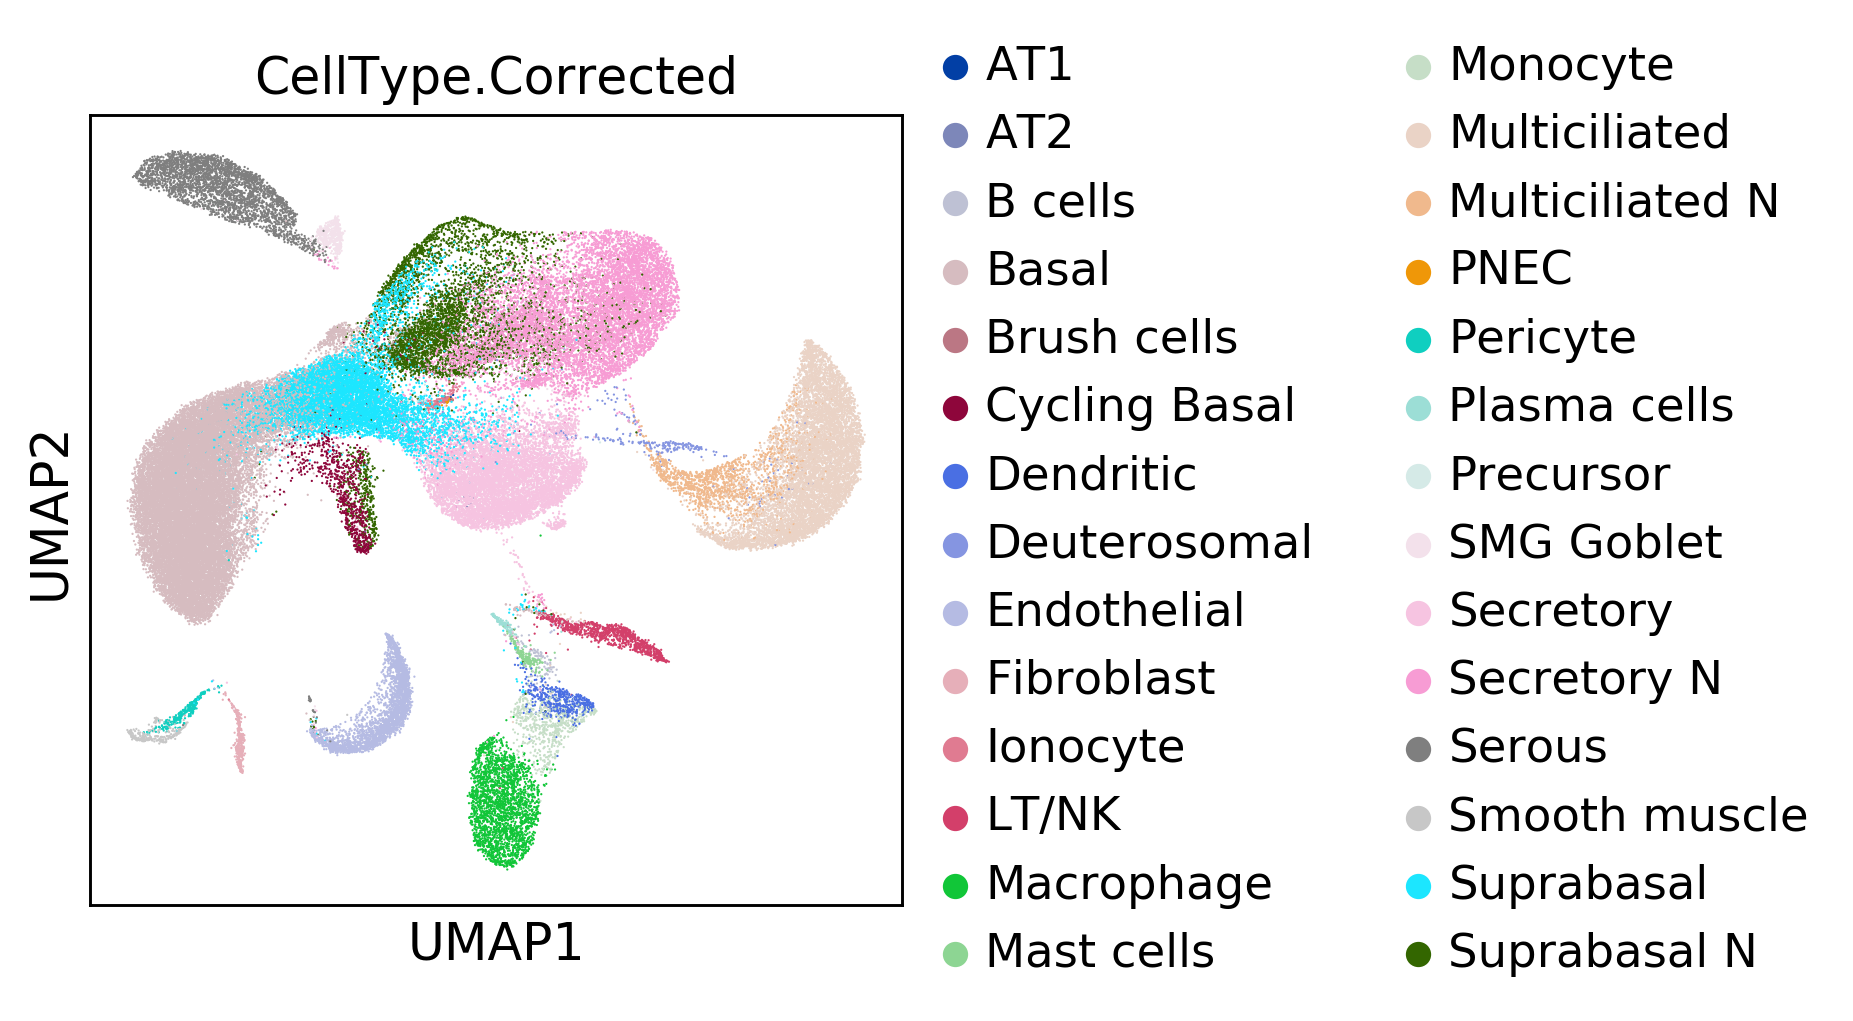

In [10]:
sc.pl.umap(adata, color=['CellType.Corrected'],edges = False)

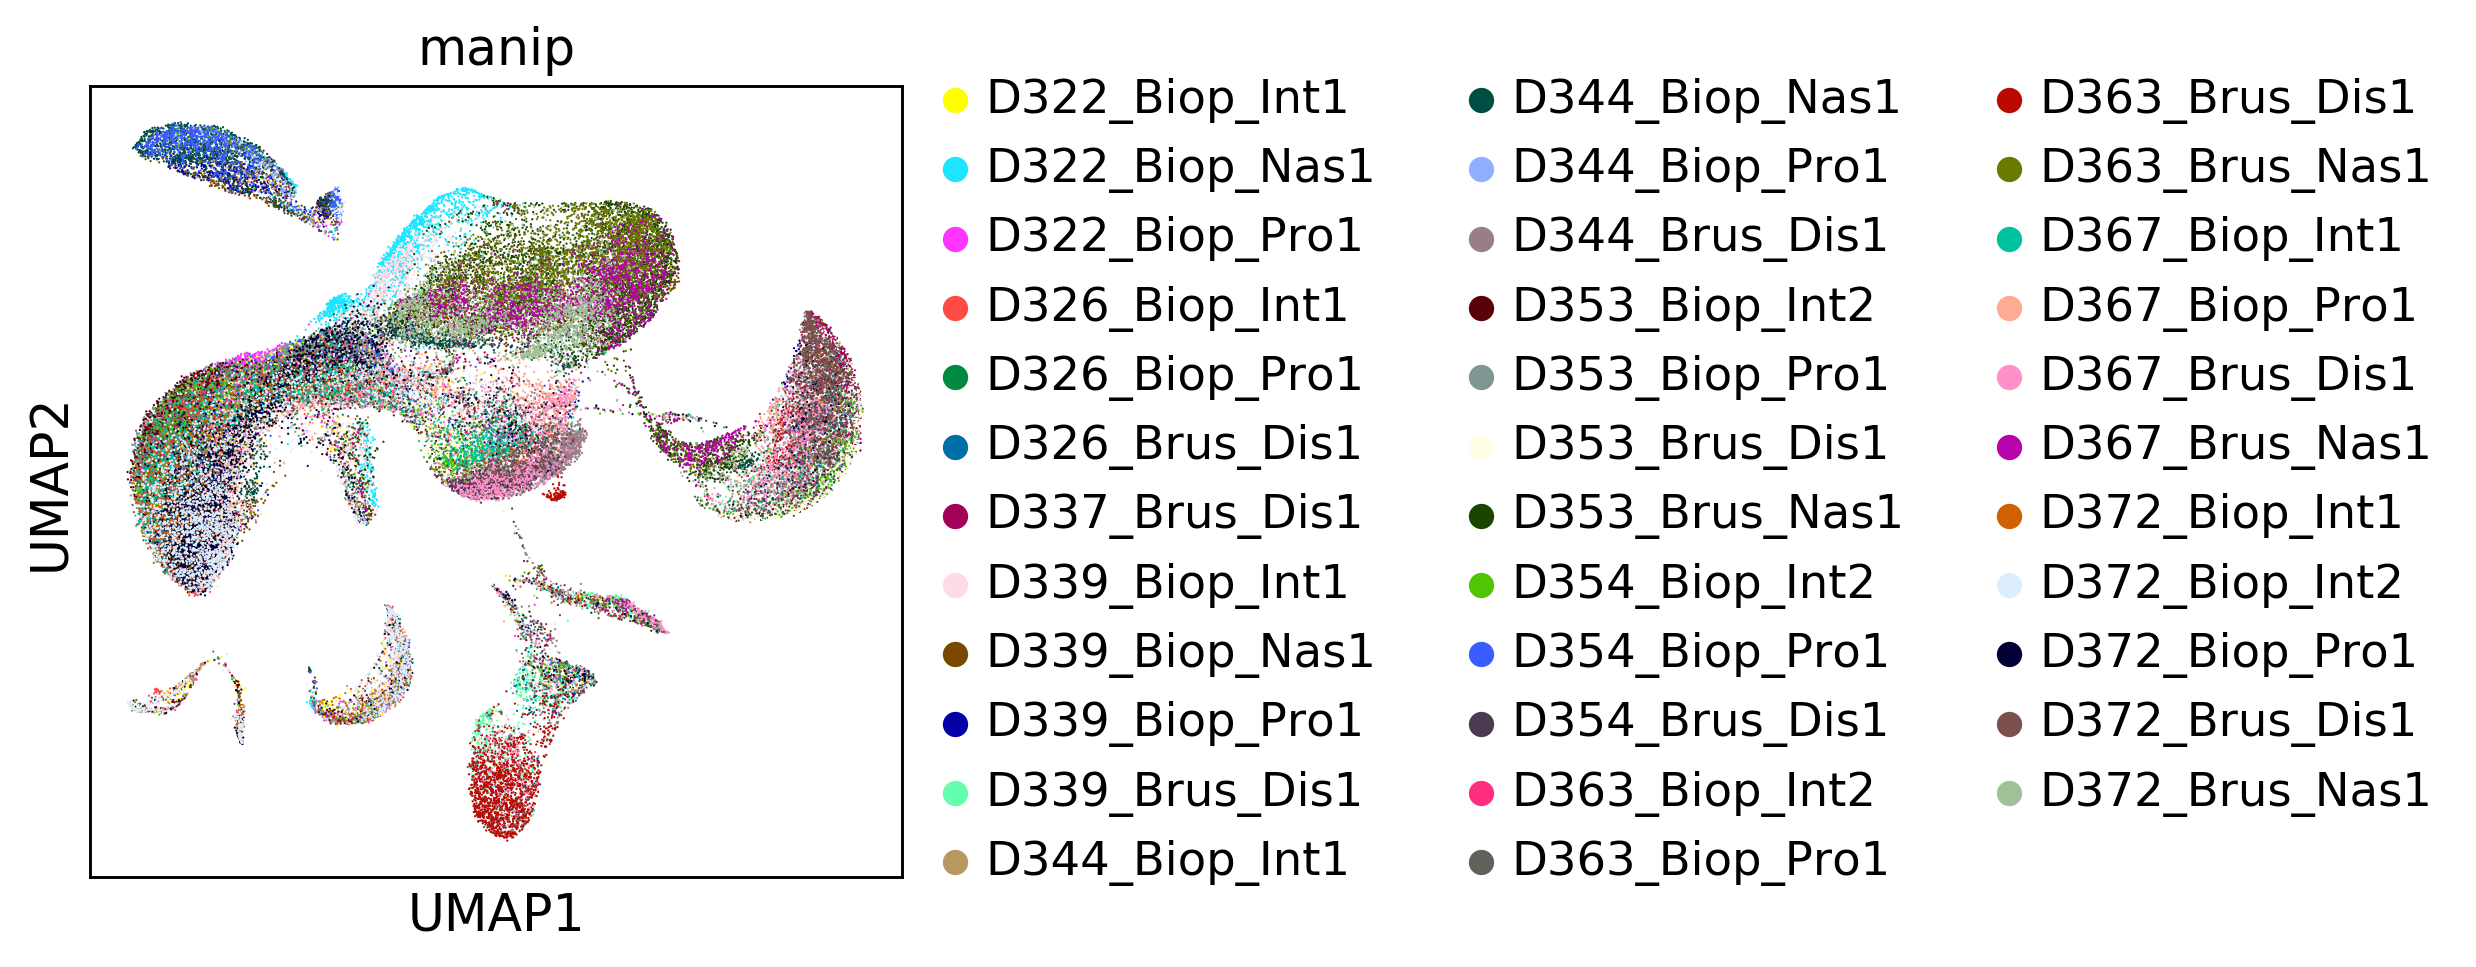

In [11]:
sc.pl.umap(adata, color=['manip'],edges = False)

In [11]:
adata.obsm['X_umap']

array([[-6.819384  , 12.77058933],
       [-4.84760313, 10.84333082],
       [-7.54345102, 13.26533908],
       ...,
       [ 1.50403473, -2.20555937],
       [ 6.02351805, -7.30889135],
       [ 3.84134571, -5.96023024]])

In [19]:
adata.obs['umap_1'] = pd.DataFrame(adata.obsm['X_umap']).iloc[:,0].tolist()
adata.obs['umap_2'] = pd.DataFrame(adata.obsm['X_umap']).iloc[:,1].tolist()


In [22]:
adata.obs.to_csv(path_or_buf = '/Data/Uncorrected_embedding.tsv', 
               sep = '\t', index = True)